# Support vector Machine (SVM) Regression Model
## This model is developed with a dummy artificial dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


## EDA

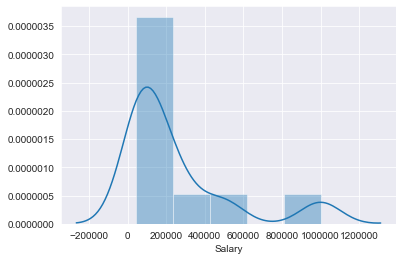

In [5]:
sns.set_style('darkgrid')
sns.distplot(dataset['Salary'])

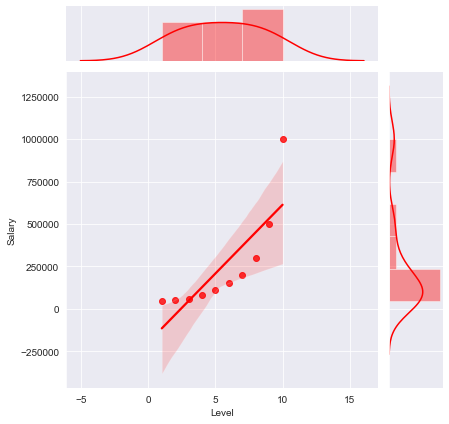

In [6]:
sns.jointplot(x = 'Level',y = 'Salary', data=dataset,kind = 'regplot',color = 'red')

In [7]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values
X_org,y_org = X,y

* Feature Scaling *

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = X.reshape(len(X),1)
sc_X = StandardScaler()
X =sc_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y = y.reshape(len(y),1)
sc_y = StandardScaler()
y =sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
from sklearn.svm import SVR

In [12]:
model = SVR(kernel = 'rbf')
model.fit(X,y)

C:\Users\Nelson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
prediction = model.predict(sc_X.transform([[6]]))

## Model's Performance Analysis

In [14]:
print(f'Actual salary is {sc_y.inverse_transform([y[5,0]])[0]}')
print(f'Predicted salary for level 6 is {sc_y.inverse_transform(prediction)[0]}')

Actual salary is 150000.0
Predicted salary for level 6 is 145503.1068857161


In [15]:
print(model.score(X,y))

0.7516001070620798


Text(0.5, 1.0, 'SVR Model for Salary  Prediction')

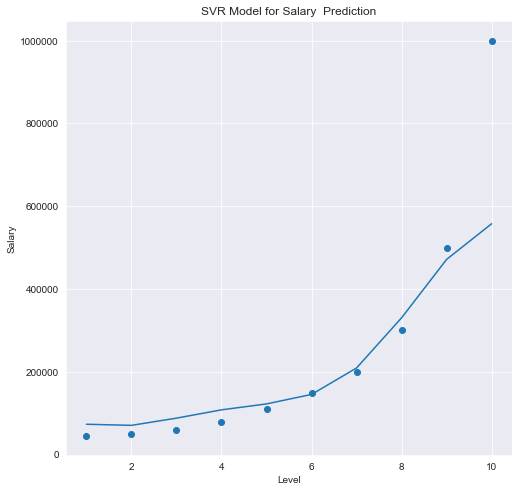

In [16]:
fig = plt.figure(figsize=(8,8))
plt.scatter(X_org,y_org)
plt.plot(X_org,sc_y.inverse_transform (model.predict(X)))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('SVR Model for Salary  Prediction')

 * The final input feature value appears like an outlier *